In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


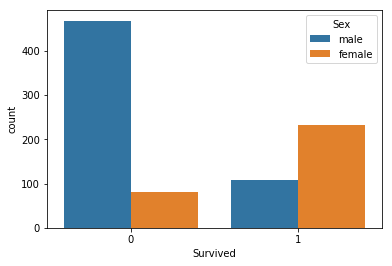

In [6]:
sns.countplot(x='Survived',hue='Sex',data=train)

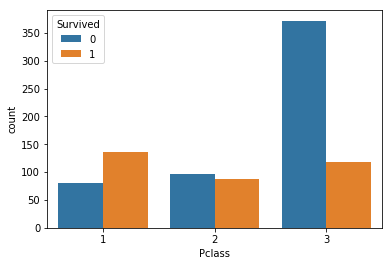

In [15]:
sns.countplot(x='Pclass',hue='Survived',data=train)

In [9]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

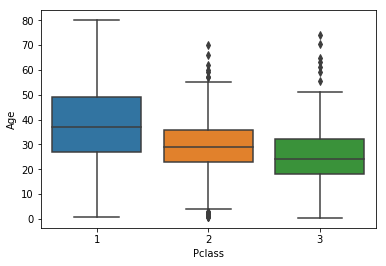

In [17]:
sns.boxplot(x='Pclass',y='Age',data=train)

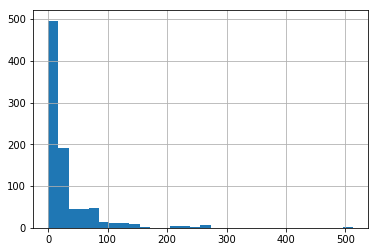

In [13]:
train['Fare'].hist(bins=30)

In [18]:
def imputeage(cols):
    Age = cols[0]
    pclass = cols[1]
    if pd.isnull(Age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 27
    else:
        return Age

In [19]:
train['Age']= train[['Age','Pclass']].apply(imputeage,axis=1)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [21]:
train.drop('Cabin',axis=1,inplace=True)

In [23]:
train.dropna(inplace=True)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [49]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
train['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [32]:
train['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
train['SibSp']=train['SibSp'].astype('category')
train['Parch']=train['Parch'].astype('category')

In [37]:
encodedDF = pd.get_dummies(train[['Embarked','Sex','SibSp','Parch']])

In [39]:
X = pd.concat([encodedDF,train.drop(['PassengerId','Name','Ticket','Survived','Embarked','Sex','SibSp','Parch'],axis=1)],axis=1)

In [41]:
#X = train.drop(['PassengerId','Name','Ticket','Survived'],axis=1)
y= train['Survived']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=101)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log = LogisticRegression()

In [46]:
log.fit(X_train,y_train)

C:\Users\Sheik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
log.intercept_

array([0.86192713])

In [48]:
log.coef_

array([[ 0.347909  ,  0.49189147,  0.02212667,  1.70973371, -0.84780658,
         0.91081611,  0.89657385,  0.49497287, -0.53911164, -0.00290907,
        -0.40060966, -0.49780532,  0.49987625,  0.71359687,  0.19264465,
         0.44595252, -0.64432985, -0.3458133 ,  0.        , -0.96899212,
        -0.02908452,  0.00176929]])

In [50]:
predict = log.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

In [52]:
print(accuracy_score(y_test,predict))

0.8146067415730337


In [53]:
print(confusion_matrix(y_test,predict))

[[98  9]
 [24 47]]


In [54]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

   micro avg       0.81      0.81      0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



In [55]:
print(roc_auc_score(y_test,predict))

0.7889298407266027


In [79]:
pred_prob = log.predict_proba(X_test)

In [81]:
pred_prob[::,0]

array([0.90300564, 0.8534402 , 0.23830461, 0.08265761, 0.85171678,
       0.95521164, 0.89523453, 0.79258521, 0.92156131, 0.31106006,
       0.22847172, 0.04947405, 0.90302953, 0.29379143, 0.90278071,
       0.8836883 , 0.09470417, 0.12842687, 0.39812684, 0.90302953,
       0.90291068, 0.90240474, 0.62473974, 0.68933708, 0.9629408 ,
       0.55666246, 0.43885043, 0.29661569, 0.93802963, 0.73595957,
       0.85448047, 0.64204926, 0.97891985, 0.89785495, 0.89518213,
       0.81587028, 0.20968064, 0.9351149 , 0.8451314 , 0.87239132,
       0.40849995, 0.87120248, 0.88665859, 0.0977787 , 0.39112608,
       0.87872793, 0.40846115, 0.16768606, 0.89793117, 0.76243433,
       0.57186012, 0.21730672, 0.80971494, 0.88332563, 0.90316049,
       0.92765935, 0.56510608, 0.91501755, 0.89548097, 0.07377222,
       0.31106006, 0.08741148, 0.10382717, 0.89509004, 0.85497822,
       0.94784742, 0.88963997, 0.62093071, 0.94027935, 0.85350652,
       0.66334905, 0.87065312, 0.38450465, 0.10316677, 0.89608

In [76]:
predict

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [84]:
pred_prob

array([[0.90300564, 0.09699436],
       [0.8534402 , 0.1465598 ],
       [0.23830461, 0.76169539],
       [0.08265761, 0.91734239],
       [0.85171678, 0.14828322],
       [0.95521164, 0.04478836],
       [0.89523453, 0.10476547],
       [0.79258521, 0.20741479],
       [0.92156131, 0.07843869],
       [0.31106006, 0.68893994],
       [0.22847172, 0.77152828],
       [0.04947405, 0.95052595],
       [0.90302953, 0.09697047],
       [0.29379143, 0.70620857],
       [0.90278071, 0.09721929],
       [0.8836883 , 0.1163117 ],
       [0.09470417, 0.90529583],
       [0.12842687, 0.87157313],
       [0.39812684, 0.60187316],
       [0.90302953, 0.09697047],
       [0.90291068, 0.09708932],
       [0.90240474, 0.09759526],
       [0.62473974, 0.37526026],
       [0.68933708, 0.31066292],
       [0.9629408 , 0.0370592 ],
       [0.55666246, 0.44333754],
       [0.43885043, 0.56114957],
       [0.29661569, 0.70338431],
       [0.93802963, 0.06197037],
       [0.73595957, 0.26404043],
       [0.

In [82]:
pred_DB = np.where(pred_prob[:,0]>=0.5,0,1)